In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('mobile_dataset.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Univariate Selection

In [4]:
X = df.iloc[:,:-1]
y = df['price_range']

In [5]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [6]:
### Applying SelectKBest

ordered_rank_features = SelectKBest(score_func=chi2,k=20)
ordered_feature = ordered_rank_features.fit(X,y)

In [8]:
ordered_feature.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [12]:
score = pd.DataFrame(ordered_feature.scores_,columns=['score'])
colmns = pd.DataFrame(X.columns)

In [15]:
# concatinating score with coloumns to see the results respectively
# we can also write as "pd.Series(ordered_feature.scores_,index=X.columns)"

final = pd.concat([colmns,score],axis=1)

# nlargest will give the top n values wrt column name given
final.nlargest(10,'score')

,0,score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


### TOP 10 features to pick

# Feature Importance

* This technique gives you a score for each feature of your data, the higher the score the more relevant it is

In [16]:
from sklearn.ensemble import ExtraTreesClassifier

In [17]:
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [18]:
print(model.feature_importances_)

[0.06054066 0.02116033 0.03507892 0.02024682 0.03363433 0.01735889
 0.03728685 0.03354439 0.03731543 0.03482557 0.03345818 0.04693198
 0.0480147  0.38073869 0.03491265 0.03533713 0.03552656 0.01437671
 0.01929292 0.02041829]


<Axes: >

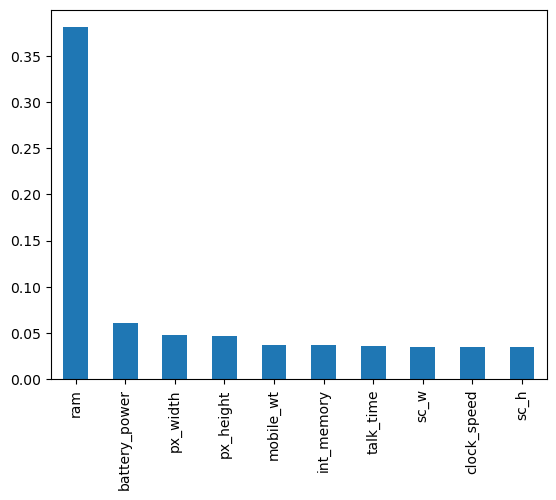

In [25]:
ranked_features = pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(10).plot(kind='bar')

# Correlation